In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [15]:
diabdata = pd.read_csv('diabetes_dataset__2019.csv')

In [16]:
diabdata.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no


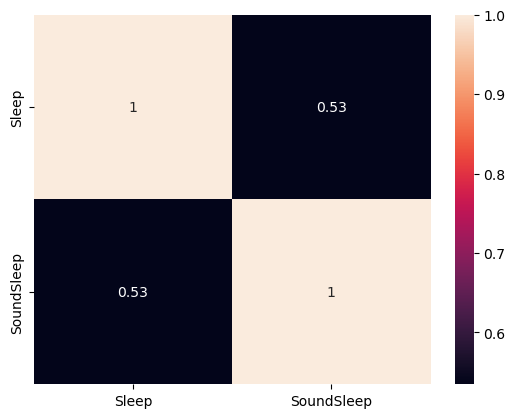

In [17]:
corr_sleep_df = diabdata[['Sleep', 'SoundSleep']] #select sleep and soundsleep
corr_sleep_mat = corr_sleep_df.corr() #correlation matrix btw two variables
sns.heatmap(corr_sleep_mat, annot=True)
plt.show()

In [26]:
#compute a simple cross tabulation of two (or more) factors
cross_tab_junk_stress = pd.crosstab(diabdata['JunkFood'], diabdata['Stress']) 
#want only first two values of tuple returned from chi2_contingency
#This function computes the chi-square statistic and p-value for the 
#hypothesis test of independence of the observed frequencies in the contingency table
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_stress)
print("Chi-square:", chi2)
print("P-value:", p_value)
#We can assume from the low p value that junk food and stress are associated
#However, we will use both since their nature is different

Chi-square: 94.09466967499688
P-value: 2.4470337530291514e-16


In [27]:
cross_tab_junk_blood = pd.crosstab(diabdata['JunkFood'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_junk_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#Here, we see that junk food as blood pressure are not that highly correlated because the p-val > 0.05
#The chi-square value is also relatively low, demonstraing the above

Chi-square: 24.951722830335264
P-value: 0.05059555690352423


In [29]:
cross_tab_high_blood = pd.crosstab(diabdata['highBP'], diabdata['BPLevel']) 
chi2, p_value, df, expvals = chi2_contingency(cross_tab_high_blood)
print("Chi-square:", chi2)
print("P-value:", p_value)
#As expetced, the variables highBP and BPlevels are highly correlated because they relate both to blood pressure
#Because of the extremely high chi-square and low p-val we are likely to omit one of the two

Chi-square: 482.23875003776743
P-value: 5.439974203257661e-102
